**Student Name: Om Yadav**

**Assignment: PwSkills**

**Domain: Healthcare**

**Project: Thyroid Disease Prediction Using Machine Learning**

**Tech Stack: Python, Machine Learning**


In [61]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
pd.set_option('display.max_columns', None)
import pickle
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
#Loading data as dataframe
#df = pd.read_csv(r"/content/hypothyroid.csv")
df = pd.read_csv(r"/content/hypothyroid.csv")

In [5]:
#reading first 5 row of dataframe
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative


In [6]:
#Checking information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [7]:
#Create a copy for better practice
data = df.copy()

In [8]:
#Shape of the data
data.shape

(3772, 30)

In [9]:
# Display all Columns
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

In [10]:
data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,288,2,70,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,?,t,?,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,3754,3738,3676,3771,3588,3403,369,3003,769,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [11]:
#Checking for null values
data.isnull().sum()

,0
age,0
sex,0
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_medication,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
query_hypothyroid,0


In [12]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

In [ ]:
#Checking for unique values in class column

data['Class'].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [13]:
#

n = len(data[data['Class'] == 'secondary_hypothyroid'])
print("No of secondary_hypothyroid in Dataset:",n)

n = len(data[data['Class'] == 'primary_hypothyroid'])
print("No of primary_hypothyroid in Dataset:",n)

n = len(data[data['Class'] == 'compensated_hypothyroid'])
print("No of compensated_hypothyroid in Dataset:",n)

n = len(data[data['Class'] == 'negative'])
print("No of negative in Dataset:",n)

No of secondary_hypothyroid in Dataset: 2
No of primary_hypothyroid in Dataset: 95
No of compensated_hypothyroid in Dataset: 194
No of negative in Dataset: 3481


In [14]:
#For checking unique value of every column
for column in data.columns:
    print(column,'--->', (data[column].unique()))

age ---> ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' '?' '93' '92']
sex ---> ['F' 'M' '?']
on_thyroxine ---> ['f' 't']
query_on_thyroxine ---> ['f' 't']
on_antithyroid_medication ---> ['f' 't']
sick ---> ['f' 't']
pregnant ---> ['f' 't']
thyroid_surgery ---> ['f' 't']
I131_treatment ---> ['f' 't']
query_hypothyroid ---> ['f' 't']
query_hyperthyroid ---> ['f' 't']
lithium ---> ['f' 't']
goitre ---> ['f' 't']
tumor ---> ['f' 't']
hypopituitary ---> ['f' 't']
psych ---> ['f' 't']
TSH_measured ---> ['t' 'f']
TSH ---> ['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' '?' '2.2' '0.6' '2.4' '1.1' 

In [15]:
col_name = ['on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured']

for col in col_name:
    print(f"No.of 'f' and 't' values are in {col} column")
    print(f"No.of f value in {col} column : {len(data[data[col] == 'f'])}")
    print(f"No.of t value in {col} column : {len(data[data[col] == 't'])}", '\n', '---'*20)

No.of 'f' and 't' values are in on_thyroxine column
No.of f value in on_thyroxine column : 3308
No.of t value in on_thyroxine column : 464 
 ------------------------------------------------------------
No.of 'f' and 't' values are in query_on_thyroxine column
No.of f value in query_on_thyroxine column : 3722
No.of t value in query_on_thyroxine column : 50 
 ------------------------------------------------------------
No.of 'f' and 't' values are in on_antithyroid_medication column
No.of f value in on_antithyroid_medication column : 3729
No.of t value in on_antithyroid_medication column : 43 
 ------------------------------------------------------------
No.of 'f' and 't' values are in sick column
No.of f value in sick column : 3625
No.of t value in sick column : 147 
 ------------------------------------------------------------
No.of 'f' and 't' values are in pregnant column
No.of f value in pregnant column : 3719
No.of t value in pregnant column : 53 
 ---------------------------------

In [16]:
#Checking for '?' value in our data which are null values

data.isin(['?']).sum()

,0
age,1
sex,150
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_medication,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
query_hypothyroid,0


In [17]:
# we can see that for column 'TBG' all the values are missing. So we will drop this column as it is of no use to us.

data = data.drop(['TBG'], axis=1)

looking to the dataset, we can see that some columns are with true and false value are just the indication that whether the next column has values or not.

In [18]:
data[['T4U_measured','T4U']]

,T4U_measured,T4U
0,t,1.14
1,f,?
2,t,0.91
3,f,?
4,t,0.87
...,...,...
3767,f,?
3768,t,1.08
3769,t,1.07
3770,t,0.94


In [19]:
## Let's drop some unnecessary columns

data = data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis =1)

In [20]:
# Now let's replace the '?' values with nan value

for col in data.columns:
    count = data[col][data[col]=='?'].count()
    if count!=0:
        data[col] = data[col].replace('?',np.nan)

In [21]:
# For rechecking

for col in data.columns:
    count = data[col][data[col]=='?'].count()
    if count==0:
        print(col, data[col][data[col]=='?'].count())

age 0
sex 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
referral_source 0
Class 0


In [22]:
#Now ? is replaced with nan value. so checking for null value
data.isna().sum()

,0
age,1
sex,150
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_medication,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
query_hypothyroid,0


In [23]:
#Now checking for datatypes of columns

data.dtypes

,0
age,object
sex,object
on_thyroxine,object
query_on_thyroxine,object
on_antithyroid_medication,object
sick,object
pregnant,object
thyroid_surgery,object
I131_treatment,object
query_hypothyroid,object


As the datatype of all columns are object, so first we've to convert them.

In [24]:
# Mapping the categorical column

data['sex'] = data['sex'].map({'F' : 0, 'M' : 1})

In [25]:
col_name = ['on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych',]

for col in col_name:
    if  len(data[col].unique())==2:
        data[col] = data[col].map({'f' : 0, 't' : 1})

In [26]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,2.5,125,1.14,109,SVHC,negative
1,23,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,2,102,NaN,NaN,other,negative
2,46,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109,0.91,120,other,negative
3,70,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175,NaN,NaN,other,negative
4,70,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61,0.87,70,SVI,negative


### Encoding categorical columns

In [27]:
#Unique values of referral_source column

data['referral_source'].unique()

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [28]:
# using one-hot-encoding

data = pd.get_dummies(data, columns=['referral_source'], drop_first=True)

In [29]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,2.5,125,1.14,109,negative,True,False,False,False
1,23,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,2,102,NaN,NaN,negative,False,False,False,True
2,46,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109,0.91,120,negative,False,False,False,True
3,70,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175,NaN,NaN,negative,False,False,False,True
4,70,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61,0.87,70,negative,False,False,True,False


In [30]:
data['Class'].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [31]:
from sklearn.preprocessing import LabelEncoder

lblEn = LabelEncoder()

data['Class'] =lblEn.fit_transform(data['Class'])

In [32]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,2.5,125,1.14,109,1,True,False,False,False
1,23,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,2,102,NaN,NaN,1,False,False,False,True
2,46,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109,0.91,120,1,False,False,False,True
3,70,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175,NaN,NaN,1,False,False,False,True
4,70,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61,0.87,70,1,False,False,True,False


In [33]:

from sklearn.impute import KNNImputer

imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
# For imputing the missing values
new_array=imputer.fit_transform(data)
# convert the nd-array returned in the step above to a Dataframe
new_data=pd.DataFrame(data=np.round(new_array), columns=data.columns)

In [34]:
new_data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,125.0,1.0,109.0,1.0,1.0,0.0,0.0,0.0
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,102.0,1.0,108.0,1.0,0.0,0.0,0.0,1.0
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,109.0,1.0,120.0,1.0,0.0,0.0,0.0,1.0
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,175.0,1.0,177.0,1.0,0.0,0.0,0.0,1.0
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,61.0,1.0,70.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,131.0,1.0,117.0,1.0,0.0,0.0,0.0,1.0
3768,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,124.0,1.0,114.0,1.0,0.0,0.0,1.0,0.0
3769,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,112.0,1.0,105.0,1.0,0.0,0.0,0.0,1.0
3770,72.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,82.0,1.0,87.0,1.0,0.0,0.0,1.0,0.0


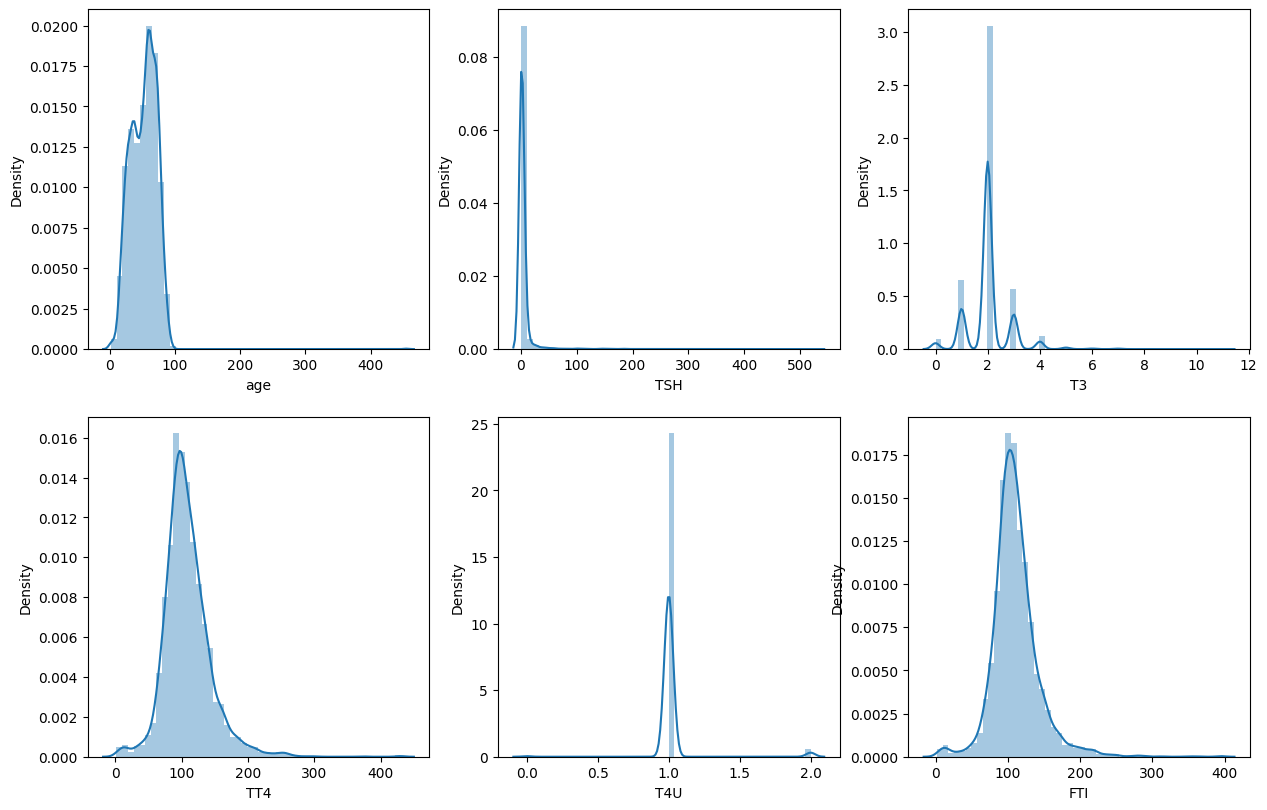

In [35]:
## For checking the distribution for our continuous data in the dataset.


columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(new_data[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

The graphs for age, TSH and T3 looks heavely skewed towards left.

Let's do some transformations to the data and see if it improves the plot.

Before doing log transformation , let's add 1 to each valuue in the column to handle exception when we try to find log of '0'.


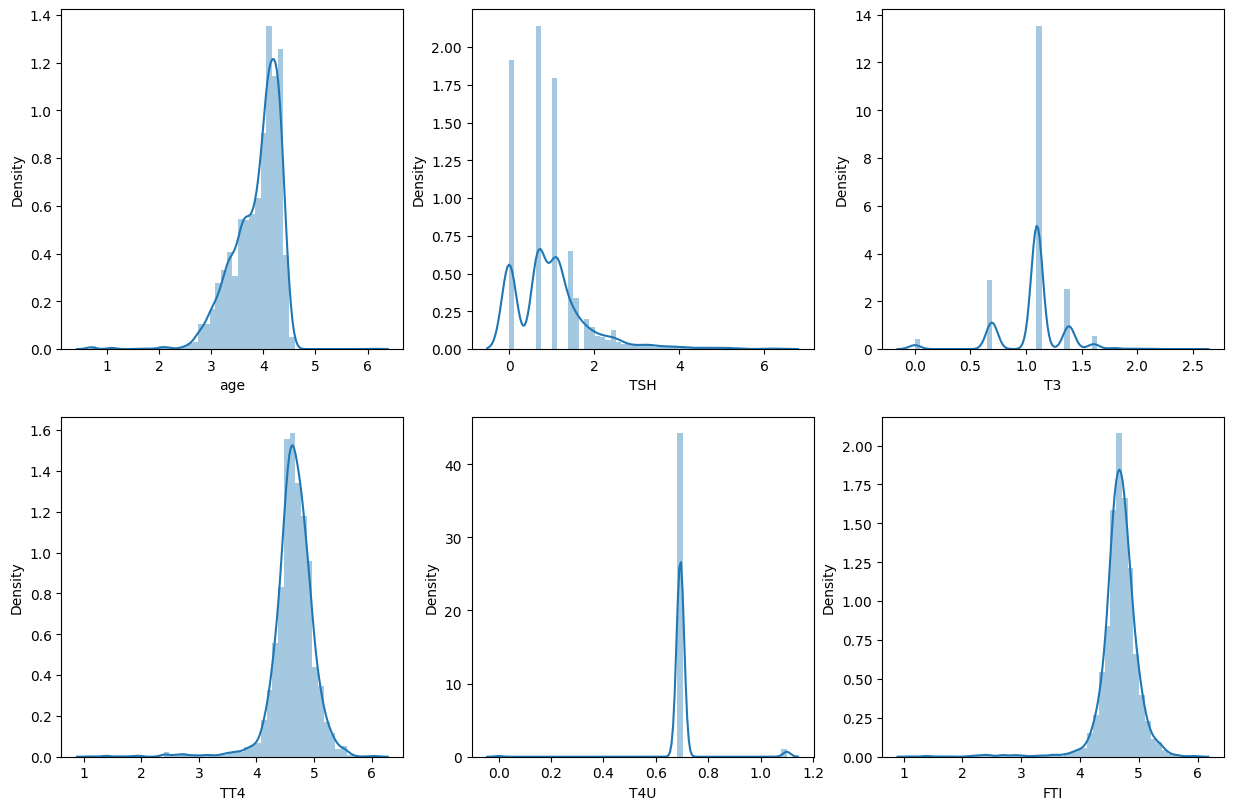

In [36]:
columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in columns:
    new_data[column]+=1
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(np.log(new_data[column]))
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

It won't give much of information so let's drop this column.

In [37]:
new_data = new_data.drop(['TSH'], axis = 1)

<Axes: xlabel='Class', ylabel='count'>

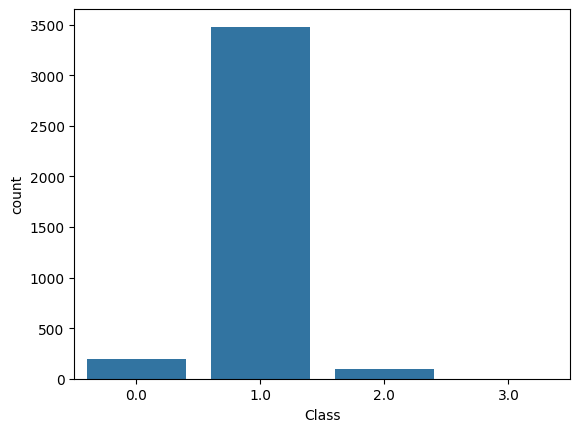

In [38]:
#countplot of class column to see the distribution
sns.countplot(data=new_data, x= 'Class')

*We can clerly see that the dataset is highly imbalanced.*

In [39]:
x = new_data.drop(['Class'],axis=1)
y = new_data['Class']

In [42]:
!pip install -U imbalanced-learn # Upgrade imblearn to the latest version
#For balancing the imbalance dataset

from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
rdsample=RandomOverSampler()

x_sampled,y_sampled  = rdsample.fit_resample(x,y) # Use fit_resample instead of fit_sample


In [43]:
#Checking for shape of x_sample
x_sampled.shape

(13924, 24)

In [44]:
#creating dataframe of x_sample
x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)
x_sampled

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,126.0,2.0,110.0,1.0,0.0,0.0,0.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,103.0,2.0,109.0,0.0,0.0,0.0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,110.0,2.0,121.0,0.0,0.0,0.0,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,176.0,2.0,178.0,0.0,0.0,0.0,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,62.0,2.0,71.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13919,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,49.0,2.0,55.0,0.0,0.0,0.0,1.0
13920,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,49.0,2.0,55.0,0.0,0.0,0.0,1.0
13921,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,1.0
13922,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,1.0


<Axes: xlabel='Class', ylabel='count'>

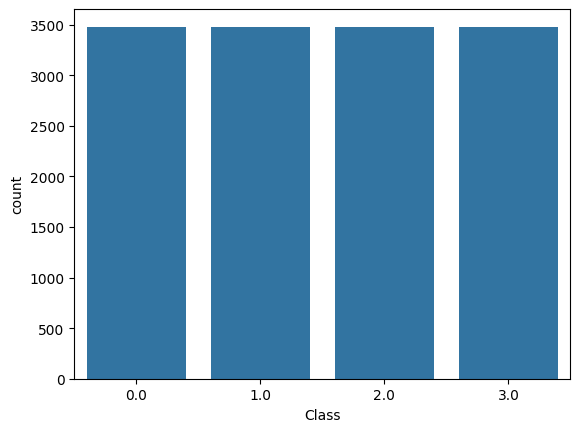

In [46]:
sns.countplot(data=new_data, x= y_sampled)

*Now dataset is balanced.*

<Axes: >

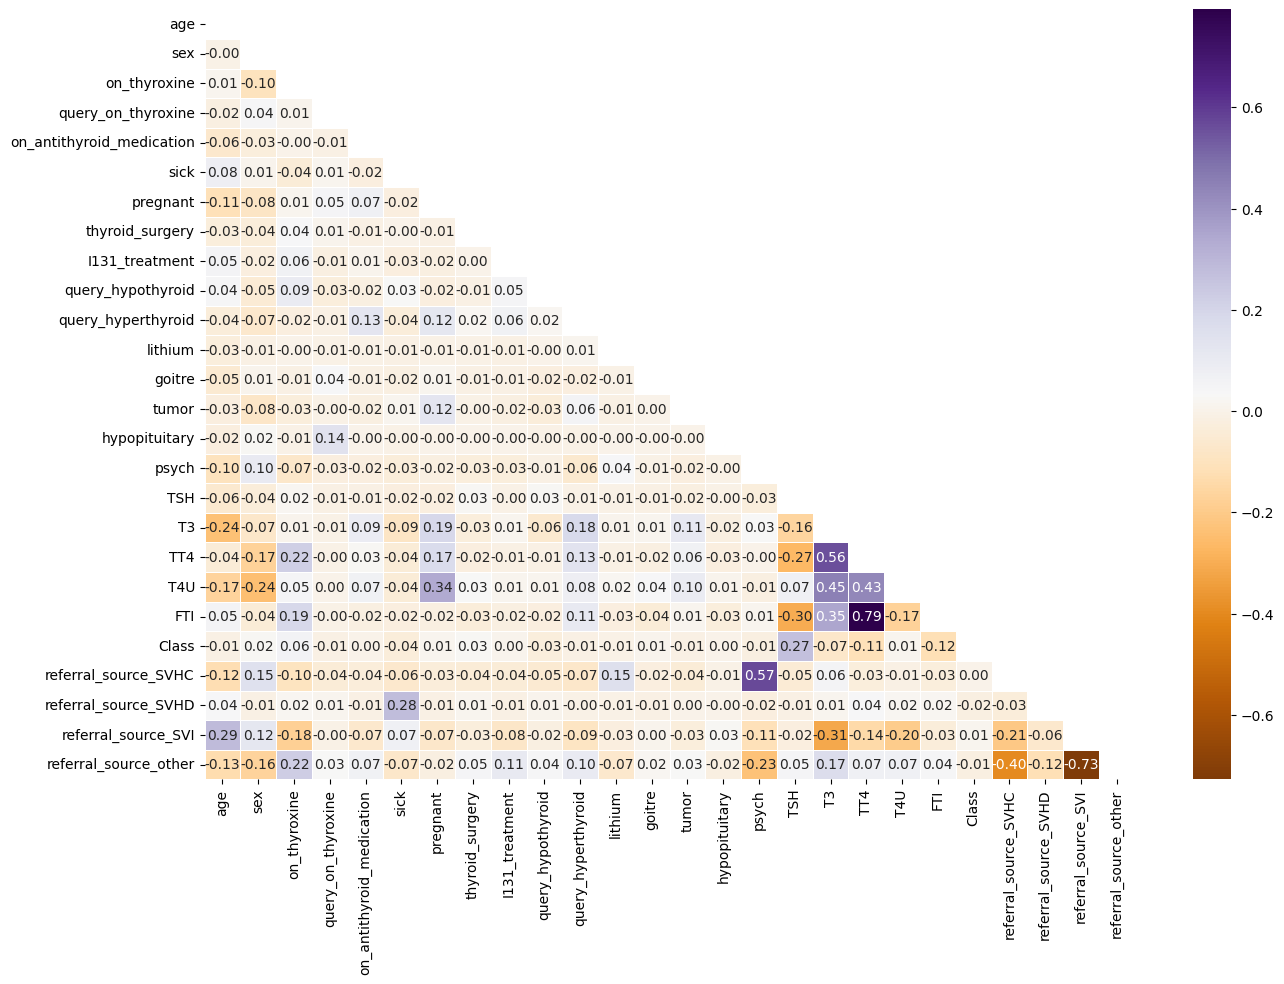

In [47]:
# Correlation Analysis Using Heatmap

plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(data.corr()))
sns.heatmap(data.corr(),mask= mask, annot=True, fmt='.2f', linewidths=0.5, cmap='PuOr')

In [48]:
#Splitting data into train and test for model building

X_train,X_test,y_train,y_test=train_test_split(x_sampled,y_sampled,test_size=0.2,random_state=0)

### Logistic regression

In [49]:
def log_classifier(X_train,X_test,y_train,y_test):
    log_model=LogisticRegression()
    log_model.fit(X_train,y_train)
    log_pred=log_model.predict(X_test)
    cm=confusion_matrix(y_test,log_pred)
    acc = accuracy_score(log_pred,y_test)
    return (f'Accuracy_Score: {acc}\n Train Score: {log_model.score(X_train,y_train)}\n Test Score: {log_model.score(X_test,y_test)}\n Confusion Matrix:\n {cm}')

### SVM

In [50]:
def svm_classifier(X_train,X_test,y_train,y_test):
    classifier_svm=SVC(kernel='rbf',random_state=0)
    classifier_svm.fit(X_train,y_train)
    svm_pred=classifier_svm.predict(X_test)
    cm=confusion_matrix(y_test,svm_pred)
    acc = accuracy_score(svm_pred,y_test)
    return (f'Accuracy_Score: {acc}\n Train Score: {classifier_svm.score(X_train,y_train)}\n Test Score: {classifier_svm.score(X_test,y_test)}\n Confusion Matrix:\n {cm}')

### knn

In [51]:
def knn_classifier(X_train,X_test,y_train,y_test):
    classifier_knn=KNeighborsClassifier(metric='minkowski',p=2)
    classifier_knn.fit(X_train,y_train)
    knn_pred=classifier_knn.predict(X_test)
    cm=confusion_matrix(y_test,knn_pred)
    acc = accuracy_score(knn_pred,y_test)
    return (f'Accuracy_Score: {acc}\n Train Score: {classifier_knn.score(X_train,y_train)}\n Test Score: {classifier_knn.score(X_test,y_test)}\n Confusion Matrix:\n {cm}')

### Decision Tree

In [52]:
def tree_classifier(X_train,X_test,y_train,y_test):
    classifier_tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    classifier_tree.fit(X_train,y_train)
    dt_pred=classifier_tree.predict(X_test)
    cm=confusion_matrix(y_test,dt_pred)
    acc = accuracy_score(dt_pred,y_test)
    return (f'Accuracy_Score: {acc}\n Train Score: {classifier_tree.score(X_train,y_train)}\n Test Score: {classifier_tree.score(X_test,y_test)}\n Confusion Matrix:\n {cm}')

### Random Forest

In [53]:
def forest_classifier(X_train,X_test,y_train,y_test):

    # create an instance of a Random Forest classifier
    classifier_forest=RandomForestClassifier(criterion='entropy',random_state=0)
    # training the Random Forest model on the sampled train dataset
    classifier_forest.fit(X_train,y_train)
    # pedicting the labels on the test set
    rf_pred=classifier_forest.predict(X_test)
    cm=confusion_matrix(y_test,rf_pred)
    acc = accuracy_score(rf_pred,y_test)
    #cl_report = classification_report(y_test,rf_pred)
    return (f'Accuracy_Score: {acc}\n Train Score: {classifier_forest.score(X_train,y_train)}\n Test Score: {classifier_forest.score(X_test,y_test)}\n Confusion Matrix:\n {cm}')

In [54]:
def print_score(X_train, X_test, y_train, y_test):
    print("Logitsic Regression:\n")
    result0=log_classifier(X_train, X_test, y_train, y_test)
    print(result0)
    print("-"*100)
    print()

    print("SVM:\n")
    result1=svm_classifier(X_train, X_test, y_train, y_test)
    print(result1)
    print("-"*100)
    print()

    print("KNN:\n")
    result2=knn_classifier(X_train, X_test, y_train, y_test)
    print(result2)

    print("-"*100)
    print()

    print("Decision Tree:\n")
    result4=tree_classifier(X_train, X_test, y_train, y_test)
    print(result4)

    print("-"*100)
    print()

    print("Random Forest:\n")
    result5=forest_classifier(X_train, X_test, y_train, y_test)
    print(result5)

print_score(X_train, X_test, y_train, y_test)

Logitsic Regression:

Accuracy_Score: 0.7784560143626571
 Train Score: 0.7756531106921627
 Test Score: 0.7784560143626571
 Confusion Matrix:
 [[367 261  44  29]
 [179 451  18   6]
 [ 40  23 635  17]
 [  0   0   0 715]]
----------------------------------------------------------------------------------------------------

SVM:

Accuracy_Score: 0.7989228007181328
 Train Score: 0.8015082143819015
 Test Score: 0.7989228007181328
 Confusion Matrix:
 [[487 200  14   0]
 [240 400  11   3]
 [ 30   7 623  55]
 [  0   0   0 715]]
----------------------------------------------------------------------------------------------------

KNN:

Accuracy_Score: 0.955475763016158
 Train Score: 0.968758416374899
 Test Score: 0.955475763016158
 Confusion Matrix:
 [[701   0   0   0]
 [113 530   9   2]
 [  0   0 715   0]
 [  0   0   0 715]]
----------------------------------------------------------------------------------------------------

Decision Tree:

Accuracy_Score: 0.9859964093357271
 Train Score: 1.0
 Te

*From the above models,it is clear that Random forest are best models for this dataset.*

In [55]:
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train,y_train)
rf_pred = classifier_forest.predict(X_test)

In [56]:
## Classification Report (Accuracy, Precision, Recall and F1 Score)

print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       701
         1.0       1.00      0.97      0.98       654
         2.0       0.99      1.00      1.00       715
         3.0       1.00      1.00      1.00       715

    accuracy                           0.99      2785
   macro avg       0.99      0.99      0.99      2785
weighted avg       0.99      0.99      0.99      2785



In [57]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier_forest, X=X_train,y=y_train,cv=10)
print(accuracies.mean())

0.9922793459377586


In [58]:
# For saving model in a pickle file

file = "thyroid_model.pkl"

In [59]:
pickle.dump(classifier_forest,open(file,'wb'))

In [60]:
model = open('thyroid_model.pkl','rb')
random_forest = pickle.load(model)